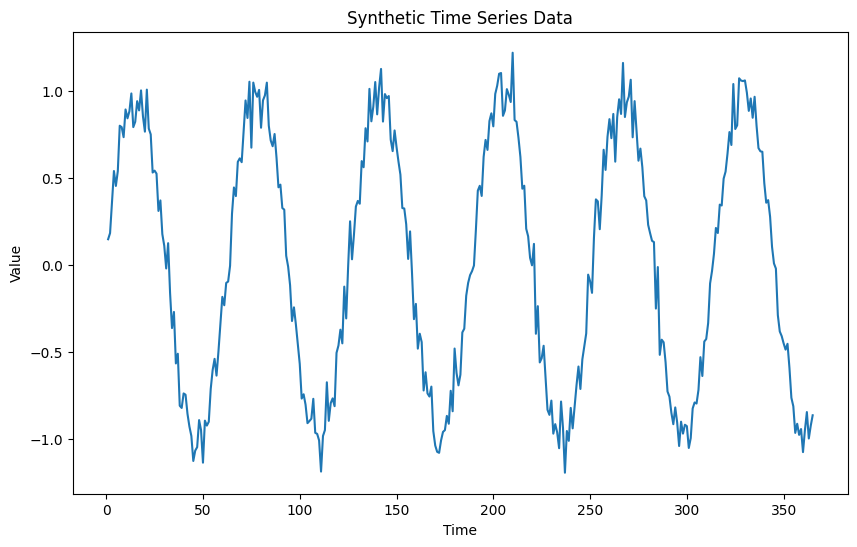

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.2143 - val_loss: 0.0481
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0542 - val_loss: 0.0436
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0344 - val_loss: 0.0293
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0293 - val_loss: 0.0211
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0189 - val_loss: 0.0131
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0112 - val_loss: 0.0041
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 13/20

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


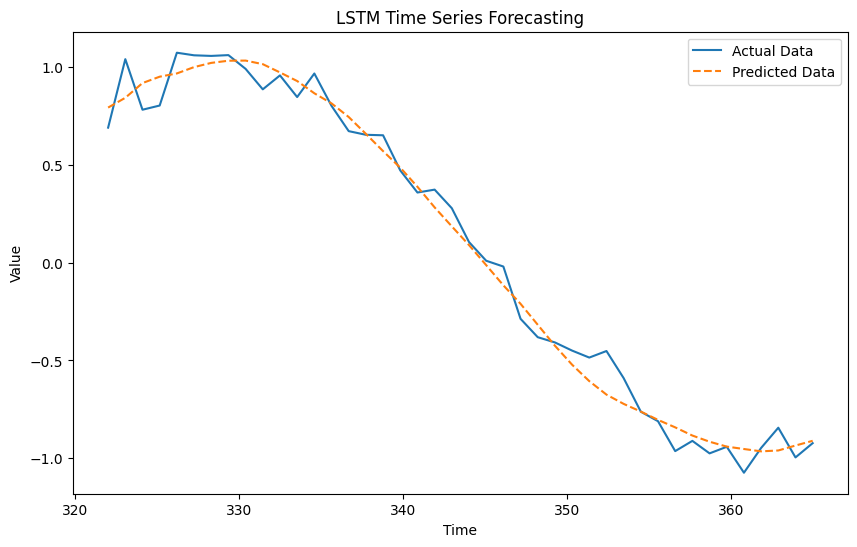

Mean Squared Error: 0.007884784218595968


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Generate synthetic time series data (e.g., daily data for a year)
np.random.seed(42)
data_length = 365  # 1 year of daily data
time_steps = np.linspace(1, data_length, data_length)
data_values = np.sin(time_steps * 0.1) + np.random.normal(0, 0.1, data_length)  # Sine wave + noise

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(time_steps, data_values)
plt.title('Synthetic Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Prepare the data for LSTM
def create_dataset(data, look_back=30):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Normalize the data using MinMaxScaler (0 to 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_values_scaled = scaler.fit_transform(data_values.reshape(-1, 1))

# Split the dataset into training and testing sets
train_size = int(len(data_values) * 0.8)
train_data, test_data = data_values_scaled[0:train_size], data_values_scaled[train_size:]

# Create dataset for LSTM
look_back = 30
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape the data into 3D array [samples, time steps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict future values using the model
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(10,6))

# Adjust time steps for the test set
test_time_steps = np.linspace(train_size + look_back, data_length, len(y_test_actual))

plt.plot(test_time_steps, y_test_actual, label='Actual Data')
plt.plot(test_time_steps, predictions, label='Predicted Data', linestyle='--')
plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Evaluate the model (optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_actual, predictions)
print(f'Mean Squared Error: {mse}')
